<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução aos Algoritmos
K-Means é um algoritmo de clusterização que tenta dividir os dados em clusters baseados na proximidade dos dados a um centroide. Ele é muito eficaz quando temos uma ideia do número de clusters que queremos e quando os clusters têm uma forma aproximadamente esférica.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clusterização baseado na densidade, que cria clusters com base em áreas de alta densidade de pontos e é menos sensível à forma dos clusters. Ele pode detectar outliers e não exige que se defina um número específico de clusters.

# 2. Importando as Bibliotecas Necessárias


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


# 3. Carregar o Dataset e Normalizar

Carregamos o dataset de vinhos da sklearn e, em seguida, normalizamos os dados para que todas as variáveis tenham a mesma escala, uma vez que tanto o K-Means quanto o DBSCAN são sensíveis às diferentes escalas das features.

In [9]:
# Carregar o dataset
data = load_wine()
X = data.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Aplicar o K-Means

Definir o Número de Clusters: Vamos usar 3 clusters, já que sabemos que o dataset de vinhos possui três classes (tipos de vinho).
Treinamento: Criamos o modelo K-Means com 3 clusters e ajustamos aos dados.
Visualizar e Avaliar: Usamos PCA para reduzir as dimensões para duas componentes principais, facilitando a visualização dos clusters. O índice de silhueta também é calculado para avaliar a qualidade dos clusters.

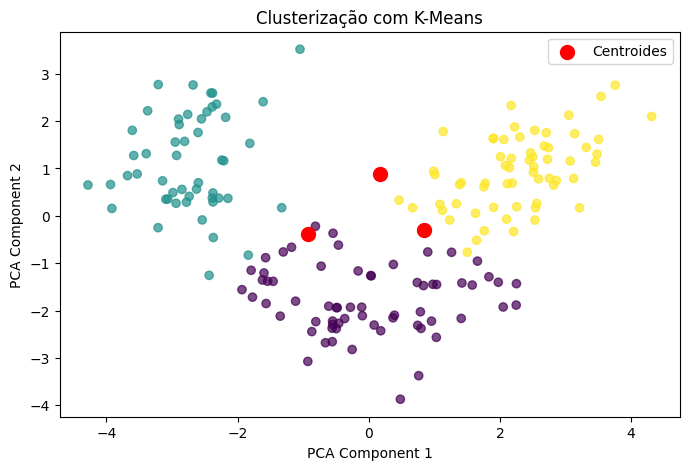

Índice de Silhueta para K-Means com k=3: 0.28


In [10]:
# Definir o número de clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar o modelo K-Means aos dados
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Reduzir a dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização com K-Means')
plt.legend()
plt.show()

# Avaliar com o índice de silhueta
silhouette_avg_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Índice de Silhueta para K-Means com k={k}: {silhouette_avg_kmeans:.2f}")


# Interpretação dos Resultados:

O gráfico mostra a clusterização dos dados em 3 grupos com seus centroides em vermelho.
O índice de silhueta indica o quão bem cada ponto está atribuído ao seu cluster (valores mais altos são melhores).

# 5. Aplicar o DBSCAN

Definir Parâmetros:

eps: A distância máxima para que pontos sejam considerados vizinhos.
min_samples: O número mínimo de pontos em um raio eps para que um ponto seja considerado núcleo de um cluster.
Esses parâmetros influenciam o tamanho e o número de clusters.

Treinamento: Ajustamos o modelo DBSCAN aos dados.

Visualizar e Avaliar: Usamos PCA para visualizar os clusters e avaliamos com o índice de silhueta.

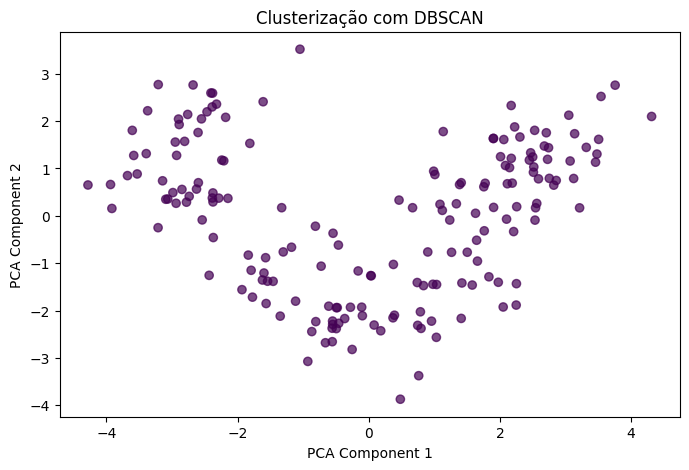

Não há clusters suficientes (sem outliers) para calcular o índice de silhueta.


In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Carregar e normalizar o dataset de vinhos
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir parâmetros e ajustar o modelo DBSCAN aos dados
dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Aplicar PCA para redução dimensional antes da visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters com PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização com DBSCAN')
plt.show()

# Avaliar com o índice de silhueta
# DBSCAN pode identificar outliers, que são marcados com -1 (necessário remover antes de calcular o índice)
mask = clusters_dbscan != -1  # Máscara para remover os outliers (clusters com valor -1)
if mask.sum() > 1:  # Checar se há pontos suficientes para calcular o índice de silhueta
    silhouette_avg_dbscan = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
    print(f"Índice de Silhueta para DBSCAN: {silhouette_avg_dbscan:.2f}")
else:
    print("Não há clusters suficientes (sem outliers) para calcular o índice de silhueta.")


# Avaliação Automática para Diversos Valores de eps e min_samples
Para facilitar a escolha dos parâmetros, você pode executar uma busca por uma combinação de valores de eps e min_samples e observar quantos clusters cada combinação identifica.

In [12]:
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Testar várias combinações de eps e min_samples
for eps in np.arange(1.0, 3.5, 0.5):  # Ajuste o intervalo conforme necessário
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(X_scaled)

        # Filtrar clusters sem outliers
        mask = clusters_dbscan != -1
        unique_labels = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)

        # Verificar se há mais de um cluster e calcular o índice de silhueta
        if unique_labels > 1 and mask.sum() > 1:
            score = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
            print(f"eps={eps}, min_samples={min_samples} => Índice de Silhueta: {score:.2f}")

            # Armazenar a melhor combinação
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Melhores parâmetros: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
print(f"Melhor Índice de Silhueta: {best_score:.2f}")


eps=1.5, min_samples=2 => Índice de Silhueta: 0.29
eps=1.5, min_samples=3 => Índice de Silhueta: 0.33
eps=1.5, min_samples=4 => Índice de Silhueta: 0.41
eps=2.0, min_samples=2 => Índice de Silhueta: 0.03
eps=2.0, min_samples=3 => Índice de Silhueta: 0.21
eps=2.0, min_samples=4 => Índice de Silhueta: 0.22
eps=2.0, min_samples=5 => Índice de Silhueta: 0.24
eps=2.5, min_samples=2 => Índice de Silhueta: 0.00
eps=3.0, min_samples=2 => Índice de Silhueta: 0.15
eps=3.0, min_samples=3 => Índice de Silhueta: 0.24
Melhores parâmetros: eps=1.5, min_samples=4
Melhor Índice de Silhueta: 0.41


# Interpretação dos Resultados:

O gráfico mostra a clusterização dos dados usando DBSCAN, onde outliers são marcados como -1.
O índice de silhueta é calculado apenas para pontos que não são outliers. Este valor mostra o quão bem os clusters estão definidos com base em densidade.

# 6. Comparação entre K-Means e DBSCAN

K-Means é eficiente para dados com clusters aproximadamente esféricos e exige um número fixo de clusters. A clusterização é guiada pela distância dos pontos aos centroides.

DBSCAN é útil para dados de formas arbitrárias e é capaz de lidar com outliers, porém, a definição dos parâmetros eps e min_samples é crucial para a formação de clusters adequados.

Observação Final: DBSCAN é preferível em cenários onde os clusters têm formatos variáveis ou onde há a presença de outliers. Já K-Means é mais direto e funciona bem em dados com formas bem definidas e pouca dispersão.

Esses exemplos e comparações ajudam a escolher o método de clusterização apropriado com base nas características do conjunto de dados.

# Explicação do Silhouette Score com Exemplo Prático

O **Silhouette Score** é uma métrica usada para avaliar a qualidade dos clusters criados por algoritmos de clusterização, como K-Means e DBSCAN. Ele mede o quão bem os pontos estão agrupados no mesmo cluster e quão distantes estão de outros clusters. O valor varia de -1 a 1, onde:

- **1**: O ponto está bem dentro do seu cluster.
- **0**: O ponto está na fronteira entre dois clusters.
- **-1**: O ponto provavelmente está no cluster errado.

## Fórmula do Silhouette Score
Para cada ponto \(i\), o Silhouette Score é calculado como:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
onde:
- \(a(i)\): A distância média entre o ponto \(i\) e todos os outros pontos do mesmo cluster.
- \(b(i)\): A distância média entre o ponto \(i\) e todos os pontos do cluster mais próximo.

O Silhouette Score geral é a média dos valores \(s(i)\) para todos os pontos.

## Exemplo Prático com o Dataset de Vinhos

Vamos calcular o Silhouette Score para K-Means e DBSCAN.

### 1. Importando as Bibliotecas e Normalizando os Dados

In [13]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Carregar o dataset de vinhos
data = load_wine()
X = data.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 1. Calculando o Silhouette Score para K-Means

Definimos o número de clusters (neste caso, 3 clusters para o dataset de vinhos).
Aplicamos o K-Means.
Calculamos o Silhouette Score.

In [14]:
# Definir o número de clusters e ajustar o modelo
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Calcular o Silhouette Score
silhouette_avg_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Silhouette Score para K-Means: {silhouette_avg_kmeans:.2f}")


Silhouette Score para K-Means: 0.28


Se o Silhouette Score estiver próximo de 1, significa que os clusters estão bem separados. Valores próximos de zero indicam que os clusters se sobrepõem, e valores negativos sugerem que muitos pontos foram agrupados incorretamente.

# 2. Calculando o Silhouette Score para DBSCAN

No caso do DBSCAN, os outliers são identificados com o valor -1, e precisamos excluí-los antes de calcular o Silhouette Score para garantir uma avaliação correta.

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Carregar o dataset de vinhos e normalizar
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Filtrar os outliers (pontos com cluster -1)
mask = clusters_dbscan != -1

# Verificar o número de clusters formados, excluindo outliers
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"Número de clusters formados (excluindo outliers): {n_clusters}")

# Calcular o Silhouette Score somente se houver mais de um cluster
if n_clusters > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
    print(f"Silhouette Score para DBSCAN: {silhouette_avg_dbscan:.2f}")
else:
    print("Número insuficiente de clusters para calcular o Silhouette Score.")


Número de clusters formados (excluindo outliers): 0
Número insuficiente de clusters para calcular o Silhouette Score.


# Interpretação dos Resultados

- Valores Altos (próximos de 1): Indicam que os clusters são bem distintos e compactos. O algoritmo encontrou uma boa estrutura nos dados.
- Valores Baixos (próximos de 0): Mostram que os clusters estão se sobrepondo. É possível que o número de clusters escolhido não seja o ideal.
- Valores Negativos: Sugerem que muitos pontos estão atribuídos aos clusters errados, o que indica que o algoritmo de clusterização não foi eficiente com os parâmetros escolhidos ou que a estrutura dos dados não se adapta bem ao método escolhido.

O Silhouette Score ajuda a ajustar o número de clusters (no caso do K-Means) e os parâmetros de densidade (no caso do DBSCAN), melhorando a interpretação e a qualidade dos clusters formados.

# Método do Cotovelo (Elbow Method)

O **Elbow Method** é uma técnica usada para encontrar o número ideal de clusters (\( k \)) em algoritmos de clusterização, como o K-Means. Ele se baseia na observação de que adicionar mais clusters reduz a soma das distâncias entre os pontos e os centroides (ou seja, a **Soma das Distâncias ao Quadrado dentro dos Clusters** - WCSS), mas a melhoria tende a diminuir a partir de certo ponto. O método sugere escolher o número de clusters onde há uma "quebra" ou "cotovelo" na curva, indicando o ponto em que o ganho na redução de WCSS começa a ser menor.

## Passos do Elbow Method

1. **Calcular o K-Means para vários valores de \( k \)**:
   - Execute o K-Means para diferentes valores de \( k \), como de 1 a 10.
   
2. **Calcule a Soma das Distâncias ao Quadrado dentro dos Clusters (WCSS)**:
   - Para cada valor de \( k \), calcule a WCSS, que mede a compactação dos clusters.
   
3. **Plotar a WCSS vs. \( k \)**:
   - Crie um gráfico que mostre a WCSS para cada valor de \( k \). O número ideal de clusters é onde a curva forma um "cotovelo".

4. **Identificar o Cotovelo**:
   - O ponto onde a redução na WCSS começa a diminuir significativamente indica o valor ideal de \( k \), pois adicionar mais clusters além desse ponto resulta em pouca melhoria na compactação.

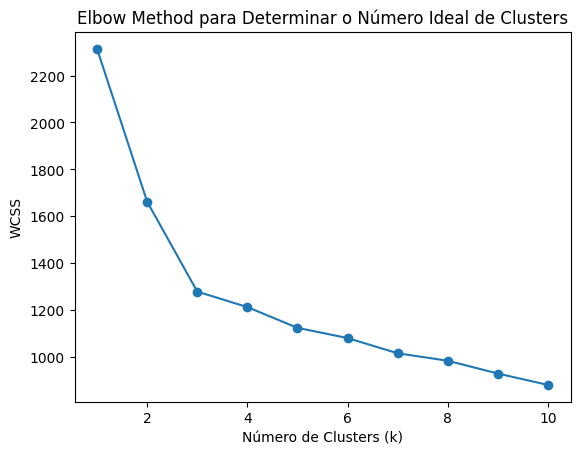

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
data = load_wine()
X = data.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar a WCSS para cada valor de k
wcss = []

# Executar o K-Means para valores de k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico WCSS vs. número de clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method para Determinar o Número Ideal de Clusters')
plt.show()

## Interpretação do Gráfico do Elbow Method

Após executar o Elbow Method, obtemos um gráfico que mostra a **Soma das Distâncias ao Quadrado dentro dos Clusters** (WCSS) em relação ao número de clusters (\( k \)).

### Como Interpretar o Gráfico

1. **Eixo X (Número de Clusters \( k \))**:
   - Representa o número de clusters usados em cada execução do K-Means.
   - À medida que \( k \) aumenta, os clusters tendem a ser menores e mais compactos, reduzindo a WCSS.

2. **Eixo Y (WCSS - Soma das Distâncias ao Quadrado)**:
   - A WCSS mede a compactação dos clusters; valores mais baixos indicam clusters mais compactos.
   - Com o aumento do número de clusters, a WCSS tende a diminuir, pois os pontos ficam mais próximos dos centroides.

3. **Identificação do "Cotovelo"**:
   - O "cotovelo" do gráfico é o ponto onde a redução na WCSS ao aumentar \( k \) começa a diminuir significativamente.
   - Este ponto é o valor ideal de \( k \) porque a compactação dos clusters melhora muito pouco ao adicionar mais clusters.

### Escolhendo o Número Ideal de Clusters

- **Antes do Cotovelo**: Adicionar clusters resulta em uma redução substancial na WCSS, o que significa que os clusters estão ficando mais compactos.
- **No Cotovelo**: É o ponto onde a curva começa a "achatar". Este é o valor de \( k \) que equilibra o número de clusters e a compactação.
- **Depois do Cotovelo**: Adicionar mais clusters não reduz significativamente a WCSS. Neste ponto, os clusters estão suficientemente compactos, e aumentar \( k \) resulta em clusters redundantes.

### Exemplo

Imagine que o gráfico do Elbow Method para o dataset de vinhos forma um cotovelo em \( k = 3 \). Isso indica que dividir o conjunto de dados em 3 clusters é uma boa escolha, pois:
- A WCSS diminui substancialmente ao passar de 1 para 3 clusters.
- Depois de \( k = 3 \), a redução da WCSS é pequena, indicando que clusters adicionais não melhoram a compactação significativamente.

Assim, o **Elbow Method** nos ajuda a escolher o número de clusters que oferece a melhor divisão do conjunto de dados com base na distribuição e densidade dos pontos.



# Índice de Calinski-Harabasz (Calinski-Harabasz Index)

O **Índice de Calinski-Harabasz** (também conhecido como **Índice da Razão de Dispersão**) é uma métrica usada para avaliar a qualidade dos clusters formados em algoritmos de clusterização, como K-Means e DBSCAN. Ele mede a "compactação" dos clusters e a "separação" entre eles, ajudando a determinar o número ideal de clusters (\( k \)).

## Como Funciona o Índice de Calinski-Harabasz

O índice é calculado com base nas razões de dispersão entre os clusters e dentro dos clusters. Um valor mais alto indica clusters mais compactos e bem separados, o que significa uma melhor qualidade de clusterização.

O Índice de Calinski-Harabasz para um número de clusters \( k \) é dado pela fórmula:

\[
CH = \frac{\text{dispersão entre clusters}}{\text{dispersão dentro dos clusters}} \times \frac{N - k}{k - 1}
\]

onde:
- **Dispersão entre clusters**: Mede a distância entre os centróides dos clusters.
- **Dispersão dentro dos clusters**: Mede a distância média dos pontos ao centróide de seu cluster.
- \( N \): Número total de pontos.
- \( k \): Número de clusters.

### Como Interpretar o Índice de Calinski-Harabasz

- **Valores mais altos**: Indicam clusters mais compactos e bem separados, o que representa uma melhor qualidade de clusterização.
- **Valores mais baixos**: Sugerem que os clusters estão dispersos ou muito próximos uns dos outros, indicando que a qualidade da clusterização é baixa para aquele valor de \( k \).

## Exemplo de Código

Vamos calcular o Índice de Calinski-Harabasz para diferentes valores de \( k \) no dataset de vinhos para encontrar o número ideal de clusters.

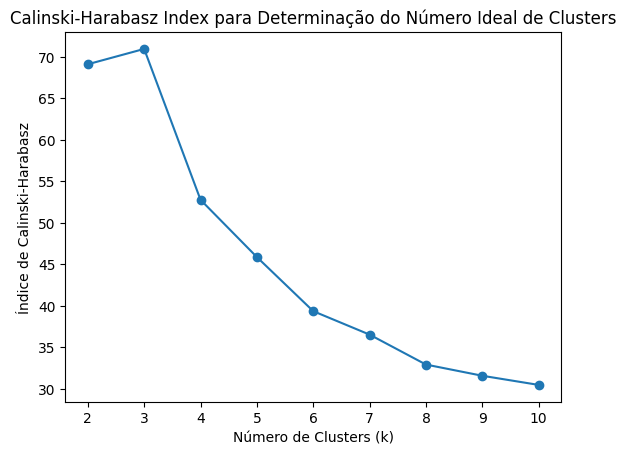

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Carregar o dataset de vinhos
data = load_wine()
X = data.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar o Índice de Calinski-Harabasz para cada valor de k
calinski_scores = []

# Calcular o Índice de Calinski-Harabasz para valores de k de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    calinski_scores.append(score)

# Plotar o gráfico Calinski-Harabasz vs. número de clusters
plt.plot(range(2, 11), calinski_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Calinski-Harabasz Index para Determinação do Número Ideal de Clusters')
plt.show()

## Interpretação do Gráfico do Índice de Calinski-Harabasz

Após calcular o Índice de Calinski-Harabasz para diferentes valores de \( k \) (número de clusters), obtemos um gráfico que ajuda a identificar o número ideal de clusters para o nosso modelo de clusterização.

### Como Interpretar o Gráfico

1. **Eixo X (Número de Clusters \( k \))**:
   - Representa o número de clusters testados em cada execução do K-Means.
   - À medida que \( k \) aumenta, os clusters tornam-se mais específicos, o que pode aumentar o Índice de Calinski-Harabasz, mas apenas até certo ponto.

2. **Eixo Y (Índice de Calinski-Harabasz)**:
   - O Índice de Calinski-Harabasz mede a qualidade dos clusters formados para cada valor de \( k \).
   - Valores mais altos indicam clusters mais bem definidos, ou seja, compactos e bem separados uns dos outros.

3. **Escolhendo o Número Ideal de Clusters**:
   - O número ideal de clusters é o valor de \( k \) onde o Índice de Calinski-Harabasz é maximizado.
   - Um aumento substancial no índice de um valor de \( k \) para outro indica uma melhora significativa na qualidade dos clusters.
   - Se o índice começa a estabilizar ou diminuir conforme \( k \) aumenta, isso sugere que adicionar mais clusters não melhora a qualidade da clusterização.

### Exemplo de Interpretação

Se o gráfico do Índice de Calinski-Harabasz atingir um pico em \( k = 3 \), isso sugere que dividir o conjunto de dados em 3 clusters oferece a melhor combinação de compactação e separação para os dados. Isso indica que o modelo K-Means com 3 clusters é ideal, pois clusters adicionais não aumentam significativamente a qualidade da clusterização.

O **Índice de Calinski-Harabasz** ajuda a identificar o ponto onde os clusters são mais bem definidos, equilibrando a quantidade e a qualidade dos clusters.


# Índice de Davies-Bouldin (Davies-Bouldin Index)

O **Índice de Davies-Bouldin** é uma métrica que mede a qualidade dos clusters formados em algoritmos de clusterização, como K-Means e DBSCAN. Ele avalia a "compactação" dos clusters e a "separação" entre eles. Diferente de outras métricas, valores menores do Índice de Davies-Bouldin indicam clusters mais bem definidos.

## Como Funciona o Índice de Davies-Bouldin

O índice é calculado com base nas distâncias médias entre os pontos dentro dos clusters e entre os centroides dos clusters, fornecendo uma medida da qualidade dos clusters. Ele é definido como a média da similaridade máxima entre cada cluster e o cluster mais próximo a ele.

O Índice de Davies-Bouldin para um conjunto de clusters \( k \) é dado por:

\[
\text{DB} = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
\]

onde:
- \( \sigma_i \): Dispersão média dos pontos dentro do cluster \( i \).
- \( d(c_i, c_j) \): Distância entre os centroides dos clusters \( i \) e \( j \).
- \( k \): Número total de clusters.

### Como Interpretar o Índice de Davies-Bouldin

- **Valores Menores**: Indicam clusters mais compactos e bem separados, o que representa uma melhor qualidade de clusterização.
- **Valores Maiores**: Sugerem que os clusters estão sobrepostos ou muito dispersos, o que indica uma baixa qualidade de clusterização para aquele valor de \( k \).

## Exemplo de Código

Vamos calcular o Índice de Davies-Bouldin para diferentes valores de \( k \) no dataset de vinhos para encontrar o número ideal de clusters.


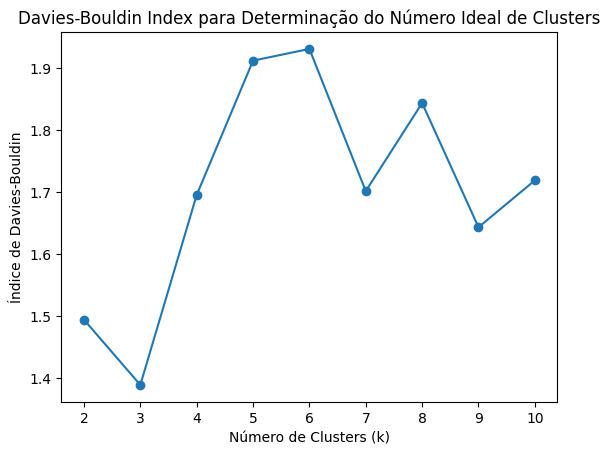

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Carregar o dataset de vinhos
data = load_wine()
X = data.data

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar o Índice de Davies-Bouldin para cada valor de k
davies_bouldin_scores = []

# Calcular o Índice de Davies-Bouldin para valores de k de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    davies_bouldin_scores.append(score)

# Plotar o gráfico Davies-Bouldin vs. número de clusters
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Davies-Bouldin')
plt.title('Davies-Bouldin Index para Determinação do Número Ideal de Clusters')
plt.show()

## Interpretação do Gráfico do Índice de Davies-Bouldin

Após calcular o Índice de Davies-Bouldin para diferentes valores de \( k \) (número de clusters), obtemos um gráfico que ajuda a identificar o número ideal de clusters para a clusterização.

### Como Interpretar o Gráfico

1. **Eixo X (Número de Clusters \( k \))**:
   - Representa o número de clusters testados em cada execução do algoritmo de clusterização, como o K-Means.
   - À medida que \( k \) aumenta, o índice é recalculado para refletir a qualidade da clusterização com um número maior de clusters.

2. **Eixo Y (Índice de Davies-Bouldin)**:
   - O Índice de Davies-Bouldin mede a qualidade dos clusters para cada valor de \( k \).
   - Valores menores indicam clusters mais bem definidos, ou seja, clusters mais compactos e bem separados entre si.
   - Valores mais altos indicam clusters sobrepostos ou pouco compactos, sugerindo uma baixa qualidade de clusterização.

3. **Escolhendo o Número Ideal de Clusters**:
   - O valor ideal de \( k \) é aquele que minimiza o Índice de Davies-Bouldin.
   - Um valor baixo do índice indica uma boa qualidade de clusterização, com clusters compactos e bem separados.
   - Se o índice começa a aumentar à medida que \( k \) aumenta, isso sugere que adicionar mais clusters não melhora a qualidade da clusterização, podendo até piorá-la.

### Exemplo de Interpretação

Se o gráfico do Índice de Davies-Bouldin atinge seu menor valor em \( k = 3 \), isso sugere que dividir o conjunto de dados em 3 clusters oferece a melhor combinação de compactação e separação dos clusters. Nesse caso, o modelo K-Means com 3 clusters é a escolha ideal, pois adicionar mais clusters não melhora a qualidade da clusterização.

O **Índice de Davies-Bouldin** é uma métrica eficaz para avaliar a qualidade dos clusters, equilibrando a compactação interna dos clusters e a separação entre eles, ajudando a identificar o ponto ideal em que os clusters estão bem formados e distintos.


# Exemplo 1: Visualização de Clusters com PCA

O PCA reduz a dimensionalidade dos dados para 2D, facilitando a visualização dos clusters.



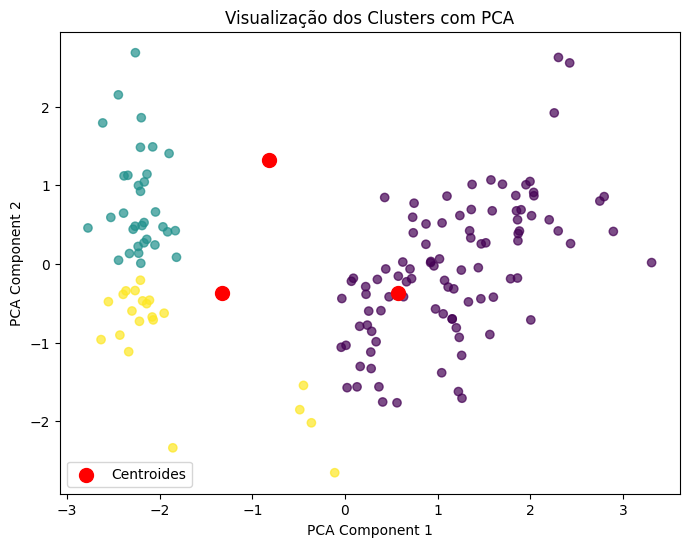

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar o dataset e normalizar os dados
data = load_iris()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar o KMeans e predizer os clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Reduzir para 2 componentes principais com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualização dos Clusters com PCA')
plt.legend()
plt.show()


# Exemplo 2: Visualização de Clusters com t-SNE

O t-SNE é outra técnica popular para visualizar clusters em dados de alta dimensionalidade. Ele preserva a proximidade dos pontos em um espaço de menor dimensão (2D).


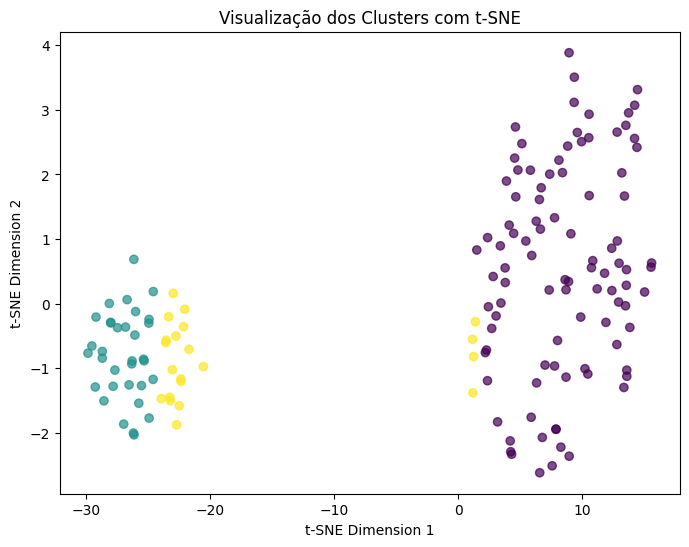

In [20]:
from sklearn.manifold import TSNE

# Ajustar o modelo t-SNE para reduzir os dados para 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters com t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Visualização dos Clusters com t-SNE')
plt.show()


# Exemplo 3: Visualização de Clusters com Parâmetros Originais e Seaborn
Se o dataset tem apenas duas ou três dimensões, você pode visualizar os clusters sem precisar de redução dimensional. Aqui, usamos o dataset iris com duas variáveis e a biblioteca seaborn para exibir os clusters.

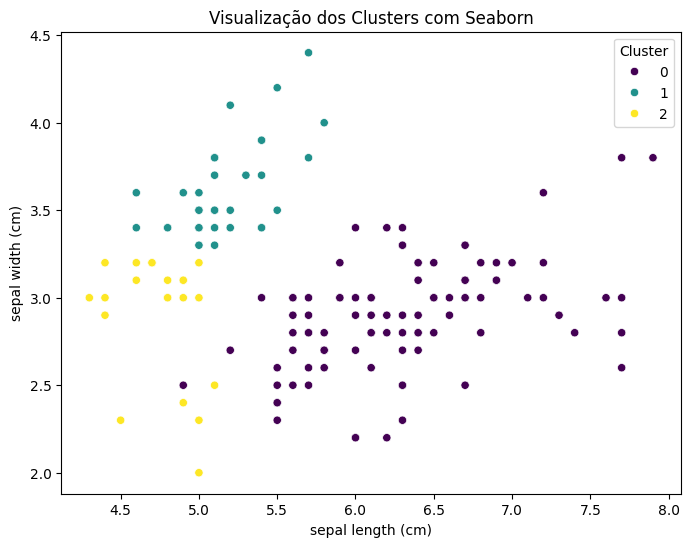

In [21]:
import seaborn as sns
import pandas as pd

# Criar um DataFrame com os dados originais
df = pd.DataFrame(X, columns=data.feature_names)
df['Cluster'] = labels  # Adicionar rótulos de clusters

# Visualizar os clusters com um gráfico de dispersão com seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis', data=df)
plt.title('Visualização dos Clusters com Seaborn')
plt.show()


# Exemplo 4: Visualização em 3D (Matplotlib)
Para datasets com três dimensões, você pode usar gráficos 3D.

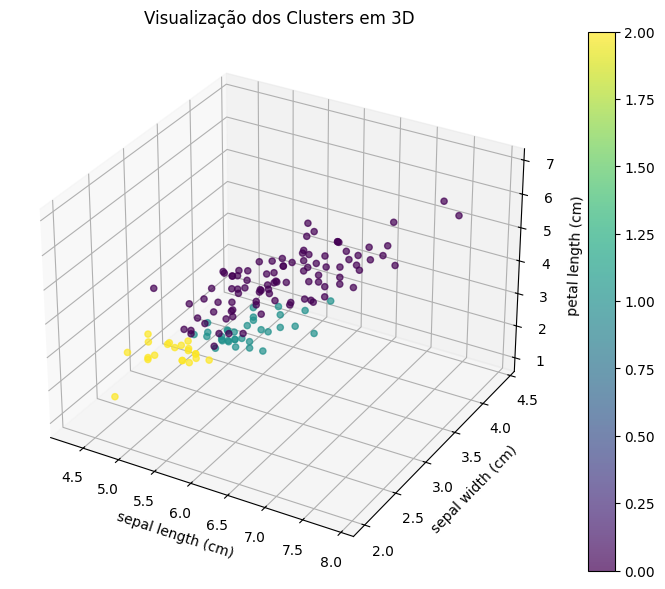

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', alpha=0.7)

# Configurações do gráfico
ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])
plt.title('Visualização dos Clusters em 3D')
plt.colorbar(sc)
plt.show()


# Exemplo 5: Visualização com Pares de Variáveis (Pairplot)
Para explorar visualmente a separação entre clusters em diferentes combinações de variáveis, você pode usar o pairplot do seaborn.

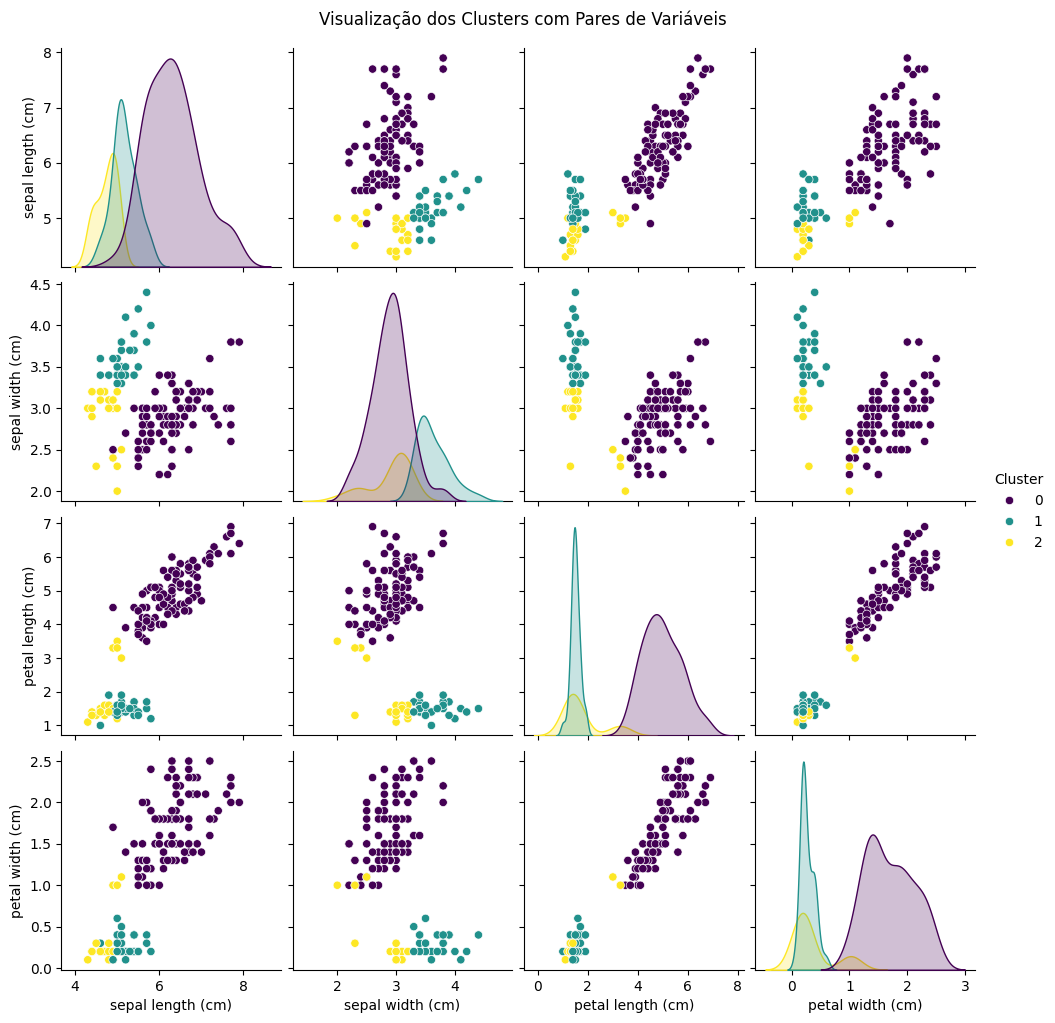

In [23]:
# Criar um pairplot para ver os clusters em diferentes pares de variáveis
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Visualização dos Clusters com Pares de Variáveis', y=1.02)
plt.show()


# Mais exemplos de clustering

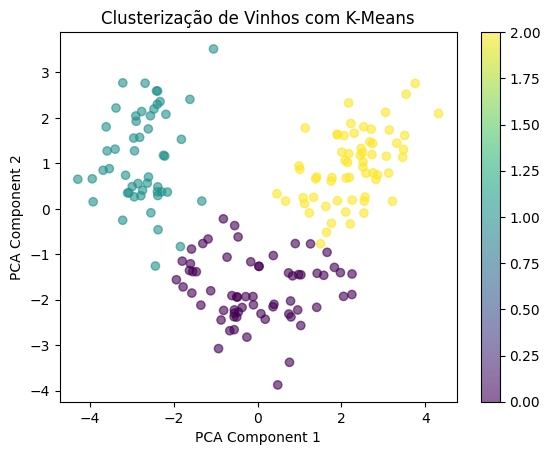

Índice de Silhueta para k=3: 0.28


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Carregar o dataset
data = load_wine()
X = data.data

# 2. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definir o número de clusters e aplicar o K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização de Vinhos com K-Means')
plt.colorbar()
plt.show()

# 6. Avaliar o índice de silhueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Índice de Silhueta para k={k}: {silhouette_avg:.2f}")


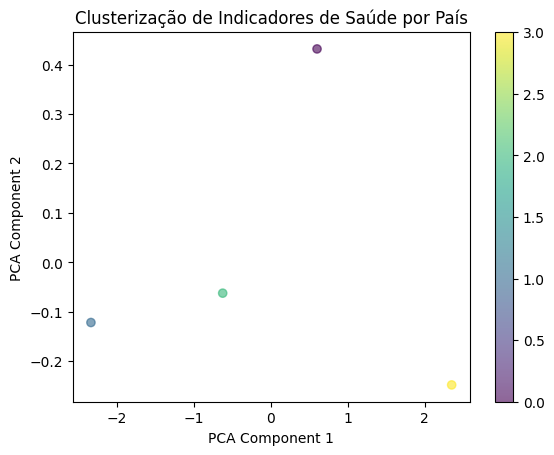

ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Carregar o dataset
# dataset = pd.read_csv("health_data.csv")  # Substitua pelo caminho do seu dataset

# Exemplo de dados simulados para IMC médio, expectativa de vida e taxa de diabetes
data = pd.DataFrame({
    'Country': ['Country A', 'Country B', 'Country C', 'Country D'],
    'BMI': [25, 27, 22, 30],
    'LifeExpectancy': [70, 68, 75, 60],
    'DiabetesRate': [8.5, 12.2, 5.0, 14.0]
})
X = data[['BMI', 'LifeExpectancy', 'DiabetesRate']]

# 2. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definir o número de clusters e aplicar o K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusterização de Indicadores de Saúde por País')
plt.colorbar()
plt.show()

# 6. Avaliar o índice de silhueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Índice de Silhueta para k={k}: {silhouette_avg:.2f}")


# Questões para Análise:

- Como o índice de silhueta varia com diferentes valores de k? Teste valores como k=3 e k=5.
- O que você pode inferir sobre a saúde geral dos países em cada cluster? Tente caracterizar os clusters em termos de saúde.
- Selecione um país de cada cluster e compare os indicadores de saúde. Como eles diferem?

# **Dataset:** World Happiness Report

**Descrição das Variáveis:**
Esse dataset contém dados sobre os níveis de felicidade em diferentes países, com variáveis que podem ser usadas para agrupar países com base em fatores que influenciam o bem-estar. As variáveis incluem:

- **Score de Felicidade:** Nota geral de felicidade média da população.
- **PIB per capita: **Produto Interno Bruto per capita de cada país.
- **Suporte Social:** Índice que mede o nível de apoio social na comunidade.
- **Expectativa de Vida Saudável:** Expectativa média de vida ajustada para a saúde.
- **Liberdade para Fazer Escolhas:** Índice que mede a liberdade percebida pela população para fazer escolhas de vida.
- **Generosidade:** Avaliação da generosidade, com base em doações e trabalho voluntário.
- **Percepção de Corrupção:** Índice que mede a percepção da população sobre a corrupção no governo e negócios.

Esses fatores oferecem insights sobre as condições sociais, econômicas e de saúde que contribuem para a felicidade e bem-estar.

# Ideia de Exercício com o World Happiness Report

**Objetivo:**

Agrupar países com base em fatores socioeconômicos e de bem-estar para identificar grupos de países com perfis semelhantes.

**Etapas:**

- Carregar o Dataset: Use bibliotecas como pandas para carregar o dataset e fazer uma análise exploratória inicial.

- Normalização: Normalize as variáveis, especialmente porque as escalas de variáveis como PIB per capita e Generosidade podem variar bastante.

- Determinação do Número de Clusters: Utilize o método do cotovelo ("Elbow Method") e o índice de silhueta para determinar o número adequado de clusters.

- Clusterização com K-Means: Aplique o K-Means para identificar agrupamentos de países baseados nos fatores de felicidade e bem-estar.

- Interpretação dos Resultados: Explore os clusters resultantes para entender quais fatores contribuem para diferentes perfis de felicidade entre os países.